# Calories Burnt Prediction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
calories = pd.read_csv(r"calories.csv")
exercise = pd.read_csv(r"exercise.csv")

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df = exercise.merge(calories, on='User_ID')

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


- Labeled data → Supervised
- Regression 

## Univariate Analysis

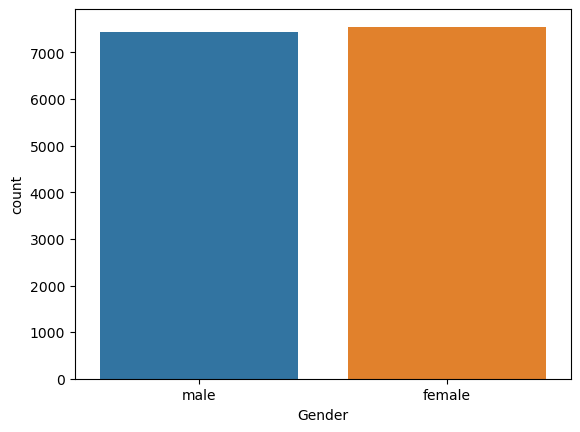

In [8]:
sns.countplot(x="Gender", data=df)
plt.show()

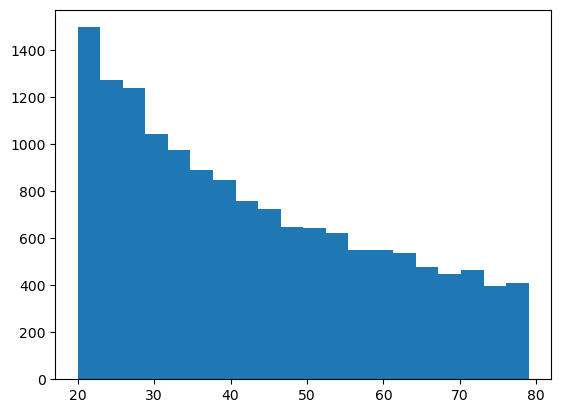

In [9]:
plt.hist(df['Age'], bins=20)
plt.show()

- Most of the active exercisers are of young age

## Bi/Multi variate Analysis

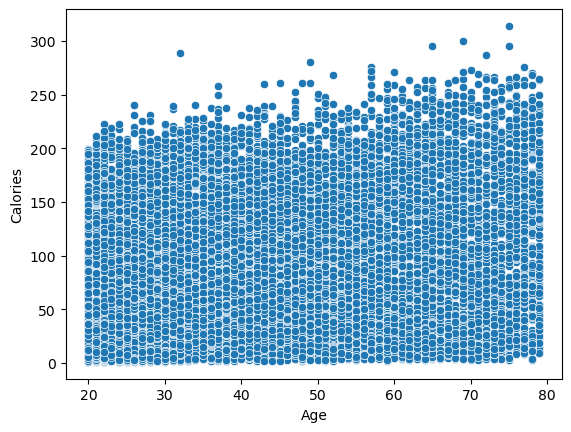

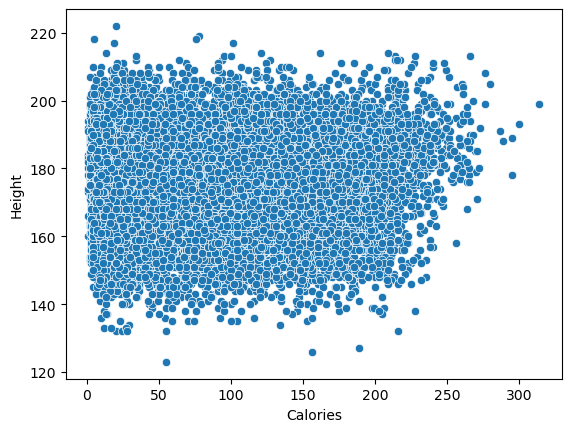

In [10]:
sns.scatterplot(x=df['Age'], y=df['Calories'])
plt.show()

sns.scatterplot(x=df['Calories'], y=df['Height'])
plt.show()

- Calories is independent of Age and Height here

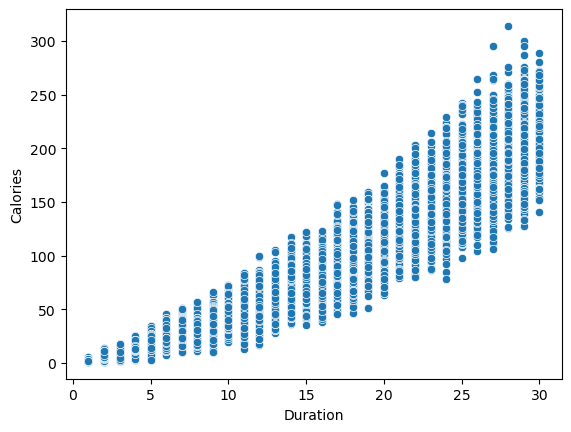

In [11]:
sns.scatterplot(y=df['Calories'], x=df['Duration'])
plt.show()

- As the duration increases, more calories are burnt

In [12]:
df['Gender'] = df['Gender'].map({'male' : 1, 'female' : 0})

In [13]:
x = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [14]:
x.shape, y.shape

((15000, 7), (15000,))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
models = {
    'Linear': LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor()
}

In [17]:
for name, model in models.items():
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    
    print(f"{name} : MSE: {mean_squared_error(y_test, predicted)}, Score: {r2_score(y_test, predicted)}\n")

Linear : MSE: 131.9957457508168, Score: 0.9672937151257296

Ridge : MSE: 131.99625903139344, Score: 0.9672935879435945

Lasso : MSE: 143.8268946117506, Score: 0.9643621590908397

DecisionTreeRegressor : MSE: 27.395666666666667, Score: 0.9932118230536607

RandomForestRegressor : MSE: 7.1173605, Score: 0.9982364399796239



The Best Algorithm: Least Mean Square Error, High r2 Score
=> Random Forest Regressor is the best here.

In [18]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predict = rfr.predict(x_test)

In [19]:
import pickle
pickle.dump(rfr, open('rfr.pkl', 'wb'))

In [20]:
x_train.to_csv('x_train.csv')